# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset:  https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews

Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

coffee_df = pd.read_csv('reviews_feb_2023.csv')
coffee_df.head()


,title,rating,acidity_structure,aftertaste,aroma,body,flavor,with_milk,agtron,blind_assessment,bottom_line,coffee_origin,est_price,notes,review_date,roast_level,roaster,roaster_location,url
0,Bolivia Manantial Gesha,93,9.0,8.0,9,8,9,NaN,60/78,"Richly aromatic, floral-toned. Magnolia, cocoa...",This washed Boliva Gesha has all the aromatics...,"Caranavi, Bolivia",$30.00/12 ounces,"Produced by Angel Mamani Chambi, entirely of t...",January 2023,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",https://www.coffeereview.com/review/bolivia-ma...
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,8.0,9,8,9,NaN,60/78,"Crisply sweet-savory. White peach, hop flowers...",A carbonic-macerated Yellow Pacamara grown in ...,"Matagalpa growing region, Nicaragua",$160.00/12 ounces,Produced by Benjamin Weiner at Finca Idealista...,December 2022,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",https://www.coffeereview.com/review/brix-break...
2,Ethiopia Gera Genji Challa,94,9.0,8.0,9,9,9,NaN,59/77,"Delicately aromatic, complex. Lilac, cocoa nib...","A nuanced, multilayered washed Ethiopia cup wi...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Ethiopia coffees like this one are largely pro...,December 2022,Medium-Light,Mostra Coffee,"San Diego, California",https://www.coffeereview.com/review/ethiopia-g...
3,Yirgacheffe Mengesha Natural,94,9.0,8.0,9,9,9,NaN,60/77,"High-toned, fruit-driven. Boysenberry, pear, c...",A fruit medley in a cup — think boysenberry an...,"Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Produced at Mengesha Farm from selections of i...,November 2022,Medium-Light,Regent Coffee,"Glendale, California",https://www.coffeereview.com/review/yirgacheff...
4,Tropical Summer Colombia La Sierra,93,9.0,8.0,9,8,9,NaN,60/77,"Fruit-driven, crisply chocolaty. Goji berry, d...","An experimentally processed Colombia, sweetly ...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Produced by smallholding farmers from trees of...,November 2022,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",https://www.coffeereview.com/review/tropical-s...


The EDA step revealed quite a lot of missing data! Here's the to-clean list I made at the end of EDA:
 -Remove 'acidity-structure', 'with_milk', 'bottom_line', and 'url' 
 -Remove 'notes' and 'bottom_line'. I might use 'blind_assessment' to look at some keywords, but that should be sufficient. 
 -Recode all ratings to int or float 
 -Do further research on agtron, recode it to be more meaningful if we want to keep it. (I believe I'll remove agtron from the scope of this project.)
 -Recode 'est_price' to be consistent. It needs a lot of work! 
 -At that point, I'll likely drop any remaining values with missing entries. I don't think I'll want to impute for these values.


I'll migrate these tasks to where they belong in the prompt below.
Also, despite how this notebook is laid out, I'll perform my cleaning in the following order:
 1. Unnecessary data
 2. Missing data
 3. Inconsistent data
 4. Irregular data


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [2]:
# -Remove 'acidity-structure', 'with_milk', 'bottom_line', 'url', 'agtron', 'review_date', and 'notes'
coffee_df.drop(['acidity_structure', 'with_milk', 'bottom_line', 'url', 'agtron', 'review_date', 'notes'], axis=1, inplace = True)
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",$30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia"
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",$160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio"
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",$28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California"
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",$20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California"
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",$18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia"


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
# -At that point, I'll likely drop any remaining values with missing entries. I don't think I'll want to impute for these values.
coffee_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             7041 non-null   object 
 1   rating            7041 non-null   object 
 2   aftertaste        6169 non-null   float64
 3   aroma             6991 non-null   object 
 4   body              7030 non-null   object 
 5   flavor            7025 non-null   object 
 6   blind_assessment  7040 non-null   object 
 7   coffee_origin     6536 non-null   object 
 8   est_price         5002 non-null   object 
 9   roast_level       6667 non-null   object 
 10  roaster           7041 non-null   object 
 11  roaster_location  7038 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.2+ KB


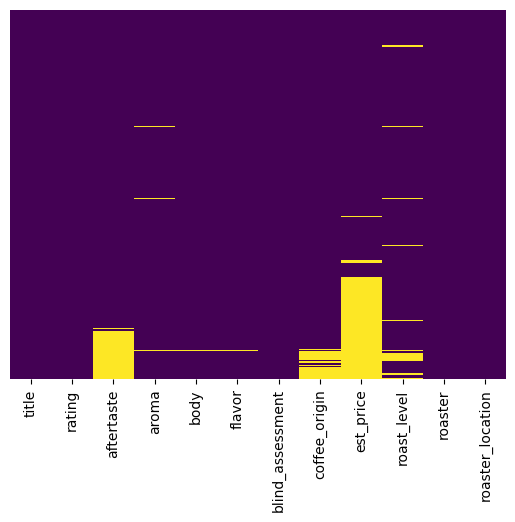

In [4]:
# Let's visualize the missing data at this point. 
sns.heatmap(coffee_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
plt.show()
# I'm going to delete all observations that are missing values. The 'est-price' feature, especially, is important to me, 
# so I don't want to have missing values there.


In [5]:
# Let's delete the rows that are missing data...
coffee_df.shape


(7041, 12)

In [6]:
coffee_df = coffee_df.dropna(axis=0, how='any')
coffee_df.shape


(4912, 12)

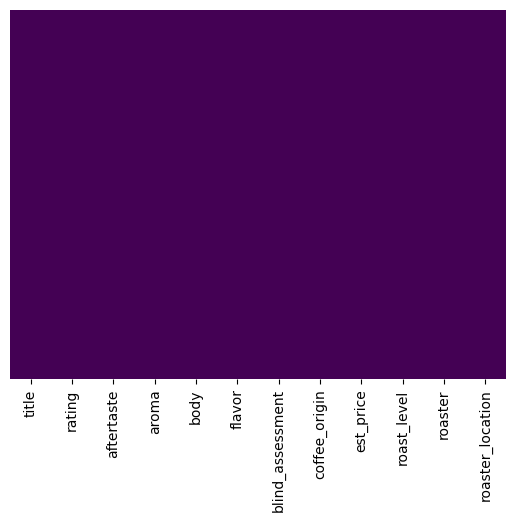

In [7]:
# Let's make sure it's all cleaned up!
sns.heatmap(coffee_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
plt.show()
# Beautiful purple rectangle...


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [8]:
# -Recode all ratings to int or float 
coffee_df['rating'] = coffee_df['rating'].astype(int)
coffee_df['aroma'] = coffee_df['aroma'].astype(int)
coffee_df['body'] = coffee_df['body'].astype(int)
coffee_df['flavor'] = coffee_df['flavor'].astype(int)
coffee_df.dtypes


title                object
rating                int32
aftertaste          float64
aroma                 int32
body                  int32
flavor                int32
blind_assessment     object
coffee_origin        object
est_price            object
roast_level          object
roaster              object
roaster_location     object
dtype: object

In [9]:
# -Recode 'est_price' to be consistent. It needs a lot of work! 
# Ok, this is the biggest task I have... I'm going to recode them to all have the same unit: Dollars per oz.
# And I'll want this as a float.
# First, I'll remove all dollar signs, then split up the dollar amount from the unit amounts.
coffee_df['est_price'] = coffee_df['est_price'].str.replace('$', '')
coffee_df.head()


C:\Users\samia\AppData\Local\Temp\ipykernel_17748\828307534.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coffee_df['est_price'] = coffee_df['est_price'].str.replace('$', '')


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia"
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio"
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California"
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California"
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia"


In [10]:
# Let's see if there are any prices without '/'. Probably not, but it's a good place to start!
not_weirdos = coffee_df['est_price'].str.contains('/')
not_weirdos.value_counts()
# 13 of them! Let's take a closer look.


True     4899
False      13
Name: est_price, dtype: int64

In [11]:
weirdos = coffee_df[~coffee_df['est_price'].str.contains('/')]
weirdos
# Wow, the 13 observations where the price does not include '/' are just garbage. I'll drop them.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location
412,Ethiopia Tamiru Tadesse Tesema Anaerobic Natural,95,9.0,9,9,9,"Intensely aromatic, richly sweet-savory, deepl...","Sidama growing region, southern Ethiopia",NA (available in store only),Medium-Light,GK Coffee,"Yilan, Taiwan"
1961,Best of Panama GNEP-01 Elida Geisha Green Tip ...,97,9.0,9,9,10,"Nuanced, ethereal, yet exceptionally lush. Ap...","Boquete growing region, western Panama",See website for more information,Medium-Light,Willoughby's Coffee & Tea,"Branford, Connecticut"
3134,Bolivia Finca Las Tacanas,92,8.0,9,8,9,"Deeply pungent, original, complex. Pecan, pome...","La Paz Department, Western Bolivia.",See review note,Medium-Light,Apasionado Coffee,"Coroico, Bolivia."
3304,Ethiopia Sidama Akrabi,94,8.0,9,9,9,"Richly pungent, juicy. Honeysuckle, mango, alm...","Guji Zone, Sidama Province, southern Ethiopia.",15.00,Medium-Light,Illuminista Coffee Roasters,"Lake, Michigan"
3462,Guatemala El Diamante Patricia Diaz Microlot,93,9.0,9,8,9,"Round, deeply sweet; layered complexity. Brown...","San Pedro Necta, Huehuetenango growing region,...",18.00,Medium-Light,Temple Coffee and Tea,"Sacramento, California"
3547,Ethiopia Guji Shakiso,92,8.0,9,8,9,"Sweet, juicy, complex. Orange- and guava-like ...","Guji Zone, Oromia Region, Sidama Province, Eth...",£6.50 for 250g,Light,Clifton Coffee Roasters,"Bristol, England, United Kingdom"
3559,Sumatra Lintong,90,8.0,8,8,8,"Deep, pungent, complex. Spicy scorched cedar, ...","Lintong growing region, northern Sumatra, Indo...",11.99,Medium-Dark,Allegro Coffee,"Thornton, Colorado"
4062,Lennette Kenya,94,9.0,9,8,9,"Juicy, sweetly bright. Blood orange, lily-like...","Nyeri growing region, south-central Kenya.",17.99,Medium-Light,Bird Rock Coffee Roasters,"La Jolla, California"
4157,P&F Espresso Blend,92,9.0,8,9,9,Evaluated as espresso. In the small cup rich a...,Not disclosed.,Not available.,Medium-Dark,P&F Coffee,"Bangkok, Thailand"
4177,Kenya Kangocho,89,8.0,8,8,8,"Very sweet but quite tart, on the edge of sour...","Nyeri County, Kenya",Not Available,Medium-Light,ChacolaTAY,"Taichung City, Taiwan"


In [12]:
coffee_df = coffee_df.drop(coffee_df[~coffee_df['est_price'].str.contains('/')].index)
coffee_df.shape


(4899, 12)

In [13]:
# Let's split the est_price into a list of of the number and the unit. We'll name it 'price_units'.
coffee_df[['dollars', 'units']] = coffee_df['est_price'].str.split('/', n=1, expand=True)
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars,units
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",30.00,12 ounces
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",160.00,12 ounces
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California",28.00,12 ounces
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California",20.50,12 ounces
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",18.99,8 ounces


In [14]:
coffee_df['units'].value_counts()
# Whoa! I'm surprised that there are 182 different types of units in this column!
# Some of them at the end look like they definitely need cleaning...


12 ounces                   2521
8 ounces                     611
16 ounces                    412
4 ounces                     133
227 grams                    119
                            ... 
14 single-serve capsules       1
3 pounds                       1
12 sticks                      1
8 ounces*                      1
320 grams                      1
Name: units, Length: 182, dtype: int64

In [15]:
# Let's break it down further.
# 'units_left' will display the number of units (ex: $30/12oz => 12).
# First I'll strip the 'units' column, just in case.
coffee_df['units'].str.strip()
coffee_df[['units_num', 'units_unit']] = coffee_df['units'].str.split(' ', n=1, expand=True)
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars,units,units_num,units_unit
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",30.00,12 ounces,12,ounces
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",160.00,12 ounces,12,ounces
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California",28.00,12 ounces,12,ounces
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California",20.50,12 ounces,12,ounces
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",18.99,8 ounces,8,ounces


In [16]:
coffee_df.loc[coffee_df['units_num'] == '']
# There are 61 rows where the split didn't take. 


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars,units,units_num,units_unit
183,Peru Gesha Limited-Release Homer Alarcón Gayoso,93,8.0,9,9,9,"Deeply rich, sweet-toned. Caramel, baking choc...","Cajamarca, Peru",30.00/ 12 ounces,Medium-Light,Amavida Coffee Roasters,"Santa Rosa Beach, Florida",30.00,12 ounces,,12 ounces
188,Guatemala Finca Las Victorias Anaerobic Natural,93,8.0,9,9,9,"Sweetly savory, deep-toned. Dark chocolate, re...","Fraijanes Plateau, Guatemala",10.00 / 8 ounces,Medium-Light,Euphora Coffee,"Taipei, Taiwan",10.00,8 ounces,,8 ounces
510,Indonesia Sumatra Natural Aceh Musara SC19,94,8.0,9,9,9,"Aromatically intense, richly sweet-savory. Dri...","Aceh Province, northern Sumatra Indonesia",NT 350/ 8 ounces,Light,Kakalove Cafe,"Chia-Yi, Taiwan",NT 350,8 ounces,,8 ounces
558,Ethiopia Guji Odo Shakiso,94,8.0,9,9,9,"Gently sweet-tart, complexly layered. Dried bl...","Guji Zone, Oromia Region, southern Ethiopia",17.99/ 12 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",17.99,12 ounces,,12 ounces
563,Costa Rica Brunca Rivense Las Moras Black Honey,94,8.0,9,9,9,"Juicy sweet, gently fermenty. Raspberry, thyme...","Brunca growing region, Costa Rica",NT 400/ 227 grams,Medium-Light,Cozy House Coffee,"Taipei City, Taiwan",NT 400,227 grams,,227 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4873,Ethiopia Yirga Cheffe Koke Espresso,94,10.0,9,8,9,Evaluated as espresso. Distinct floral- and ci...,"Yirgacheffe growing region, southern Ethiopia.",18.50 / 500 g. (17.6 oz.),Medium-Light,Coava Coffee Roasters,"Portland, Oregon",18.50,500 g. (17.6 oz.),,500 g. (17.6 oz.)
4874,Ethiopia Sidamo Natural Single Origin Espresso,93,8.0,9,8,9,Evaluated as espresso. Big floral aroma with n...,"Sidamo Province, southern Ethiopia",CAD 16 / 12 oz.,Medium,Social Coffee & Tea Company,"Richmond Hill, Ontario, Canada",CAD 16,12 oz.,,12 oz.
4881,Carmen Blend,90,7.0,8,8,9,"Rich aroma: dark chocolate, toast and a hint o...",Costa Rica; Panama; Brazil; Ethiopia; El Salva...,NT300 / 8 oz.,Medium-Dark,Carmen Cafe,"Banciao City, Taiwan",NT300,8 oz.,,8 oz.
4986,Ganesha Espresso,92,8.0,9,8,9,Evaluated as espresso. Co-taster Andy Newbom (...,Not disclosed.,64.95/ 5 pounds,Medium,Tony's Coffees & Teas,"Bellingham, Washington",64.95,5 pounds,,5 pounds


In [17]:
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_num'] == ''].index)


In [18]:
# Let's do a value count of our units so far.
coffee_df['units_unit'].value_counts()
# Ok, we can definitely clean most of this up. I'll replace 'oz.' and '.ounces' with 'ounces' to combine them, 
# and drop all K-Cups and weird exceptions.


ounces                                         3875
grams                                           593
oz.                                             153
K-Cups                                           46
capsules                                         19
                                               ... 
5-gram tubes                                      1
5-gram packets                                    1
ounces (226 grams)                                1
ounces (see notes)                                1
oz. (incl. express shipping from Guatemala)       1
Name: units_unit, Length: 63, dtype: int64

In [19]:
# Let's start by viewing this mess as a list.
coffee_df['units_unit'].unique().tolist()
# Wow, I'm definitely going to just drop a lot of these.
# I'll only keep units that are CLEARLY ounces, grams, kilograms, or pounds.
# Not some unmatched combination of units.
# Everything else must go.


['ounces',
 'grams',
 None,
 'packet',
 'grams; 200.00/50 grams',
 'tin',
 '18-gram pouches',
 'ounces (2 types)',
 'kilo (35.3 ounces)',
 'ounces; 50.00/5 pounds',
 'ounces (includes shipping)',
 'ounces (79.00/5 pounds)',
 'ounces; 35.00/2 pounds',
 'ounces (currently on sale for 36.76)',
 'ounces (packaged as a "duo" with the Bourbon Rey Jamaica)',
 'pounds',
 'sticks',
 'ounces*',
 'ounces (packaged as a "duo" with Bourbon Rey Guatemala)',
 'ounces; limited availability',
 'ounces (198 grams)',
 'ounces online; 12.99/ounces in stores',
 'capsules',
 'gram',
 '3.3 gram packets',
 '5-gram tubes',
 '5-gram single-serve packets',
 '5-gram packets',
 'ounces (226 grams)',
 'kilogram',
 'K-Cups',
 'K-cups',
 'ounces (sold out)',
 'ounces (see notes)',
 'ounces (free shipping)',
 'single-serve capsules',
 'g',
 'g.',
 'single-serve pods',
 'Vue-Packs',
 'pods',
 'capsultes',
 'single-serve cups',
 'RealCup capsules',
 'ounces.',
 'onces',
 'grams (8.8 oz.)',
 'Single-Serve Pods',
 'kg. (2

In [20]:
trash_bag = [None,
 'packet',
 'grams; 200.00/50 grams',
 'tin',
 '18-gram pouches',
 'sticks',
 'ounces (198 grams)',
 'capsules',
 '3.3 gram packets',
 '5-gram tubes',
 '5-gram single-serve packets',
 '5-gram packets',
 'ounces (226 grams)',
 'K-Cups',
 'K-cups',
 'single-serve capsules',
 'single-serve pods',
 'Vue-Packs',
 'pods',
 'capsultes',
 'single-serve cups',
 'RealCup capsules',
 'grams (8.8 oz.)',
 'Single-Serve Pods',
 'grams (17.6 oz.)',
 'grams (8.8 oz)',
 'T Discs',
 'ounces (454 grams)',
 'ounces (227 grams)',
 'grams (12.3 ounces)',
 'g (17.6 oz.)',
 'g. (8.8 oz)',
 'g. (8.8 oz.)',
 'g. (17.6 oz.)']

for item in trash_bag:
    coffee_df = coffee_df.drop(coffee_df[coffee_df['units_unit'] == item].index)

coffee_df['units_unit'].value_counts()
# Great! Now to group all the ounces with ounces, grams with grams, etc..


ounces                                                       3875
grams                                                         593
oz.                                                           153
g.                                                              7
pounds                                                          5
kg. (2.2 lbs.)                                                  4
ounces.                                                         3
kilogram                                                        3
ounces (79.00/5 pounds)                                         2
ounces (sold out)                                               1
ouncues                                                         1
ounce                                                           1
g                                                               1
ounces (free shipping)                                          1
ounces (see notes)                                              1
Kilogram  

In [21]:
coffee_df['units_unit'].unique().tolist()


['ounces',
 'grams',
 None,
 'ounces (2 types)',
 'kilo (35.3 ounces)',
 'ounces; 50.00/5 pounds',
 'ounces (includes shipping)',
 'ounces (79.00/5 pounds)',
 'ounces; 35.00/2 pounds',
 'ounces (currently on sale for 36.76)',
 'ounces (packaged as a "duo" with the Bourbon Rey Jamaica)',
 'pounds',
 'ounces*',
 'ounces (packaged as a "duo" with Bourbon Rey Guatemala)',
 'ounces; limited availability',
 'ounces online; 12.99/ounces in stores',
 'gram',
 'kilogram',
 'ounces (sold out)',
 'ounces (see notes)',
 'ounces (free shipping)',
 'g',
 'g.',
 'ounces.',
 'onces',
 'kg. (2.2 lbs.)',
 'ouncues',
 'ounce',
 'Kilogram',
 'oz.',
 'oz. (incl. express shipping from Guatemala)']

In [22]:
['ounces',
 'grams',
 None,
 'ounces (2 types)',
 'kilo (35.3 ounces)',
 'ounces; 50.00/5 pounds',
 'ounces (includes shipping)',
 'ounces (79.00/5 pounds)',
 'ounces; 35.00/2 pounds',
 'ounces (currently on sale for 36.76)',
 'ounces (packaged as a "duo" with the Bourbon Rey Jamaica)',
 'pounds',
 'ounces*',
 'ounces (packaged as a "duo" with Bourbon Rey Guatemala)',
 'ounces; limited availability',
 'ounces online; 12.99/ounces in stores',
 'gram',
 'kilogram',
 'ounces (sold out)',
 'ounces (see notes)',
 'ounces (free shipping)',
 'g',
 'g.',
 'ounces.',
 'onces',
 'kg. (2.2 lbs.)',
 'ouncues',
 'ounce',
 'Kilogram',
 'oz.',
 'oz. (incl. express shipping from Guatemala)']

to_ounces = ['ounces (2 types)',
 'ounces; 50.00/5 pounds',
 'ounces (includes shipping)',
 'ounces (79.00/5 pounds)',
 'ounces; 35.00/2 pounds',
 'ounces (currently on sale for 36.76)',
 'ounces (packaged as a "duo" with the Bourbon Rey Jamaica)',
 'ounces*',
 'ounces (packaged as a "duo" with Bourbon Rey Guatemala)',
 'ounces; limited availability',
 'ounces online; 12.99/ounces in stores',
 'ounces (sold out)',
 'ounces (see notes)',
 'ounces (free shipping)',
 'ounces.',
 'onces',
 'ouncues',
 'ounce',
 'oz.',
 'oz. (incl. express shipping from Guatemala)']

to_grams = ['gram', 'g', 'g.']
to_kilograms = ['kilo (35.3 ounces)', 'kilogram', 'kg. (2.2 lbs.)', 'Kilogram']

for item in to_ounces:
    coffee_df.loc[coffee_df['units_unit'] == item, 'units_unit'] = 'ounces'
    
for item in to_grams:
    coffee_df.loc[coffee_df['units_unit'] == item, 'units_unit'] = 'grams'

for item in to_kilograms:
    coffee_df.loc[coffee_df['units_unit'] == item, 'units_unit'] = 'kilograms'

    
coffee_df['units_unit'].unique()


array(['ounces', 'grams', None, 'kilograms', 'pounds'], dtype=object)

In [23]:
# Time to convert the units_num and dollars columns to floats and do some math.
# But first, some are still dirty (ex: some say '230g'), so let's get rid of those.

# It looks like there are several instances where an item in the 'units_num' column contains
# a value that cannot be converted to a float. Most of them are in a Taiwanese denomination of money 
# that is outside of the scope of this project, so I'll drop those. And some of them were price per pound,
# which I'll assume is price per 1 pound and recode accordingly.

coffee_df = coffee_df.drop(coffee_df[coffee_df['units_num'] == '230g'].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_num'] == '200g'].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_num'] == '225g'].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_num'] == '227g'].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['units_num'] == '16ounces'].index)
coffee_df.loc[coffee_df['units_num'] == 'pound', 'units_num'] = 1


In [24]:
coffee_df['units_num'] = coffee_df['units_num'].astype(float)


In [25]:
# Ok, first I'll convert everything to ounces.

coffee_df.loc[coffee_df['units_unit'] == 'pounds', 'units_num'] = coffee_df['units_num']*16
coffee_df.loc[coffee_df['units_unit'] == 'pounds', 'units_unit'] = 'ounces'

coffee_df.loc[coffee_df['units_unit'] == 'grams', 'units_num'] = coffee_df['units_num']*0.03527396
coffee_df.loc[coffee_df['units_unit'] == 'grams', 'units_unit'] = 'ounces'

coffee_df.loc[coffee_df['units_unit'] == 'kilograms', 'units_num'] = coffee_df['units_num']*35.27396
coffee_df.loc[coffee_df['units_unit'] == 'kilograms', 'units_unit'] = 'ounces'
    
coffee_df['units_unit'].value_counts()


ounces    4666
Name: units_unit, dtype: int64

In [26]:
# Before we convert the prices to reflect price per ounce, we need to clean up the 'dollars' column.
# I'll drop all non-dollar denominations, as they are not in the scope of this project.
# First, let's get a look at everything that contains letters.
pattern_alpha = '|'.join(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
questionable = coffee_df.loc[coffee_df['dollars'].str.slice(0,1).str.contains(pattern_alpha)]
questionable['dollars'].tolist()
# That's huge! Let's start by splitting it by ' ' and see what units we come up with.


['NT 459',
 'NT500',
 'NT700',
 'NT 520',
 'NT 450',
 'NT 450',
 'NT 450',
 'NT 550',
 'NT 350',
 'NT 420',
 'NT 630',
 'NT 880',
 'NT 500',
 'NT 1250',
 'NT 500',
 'NT 600',
 'NT 500',
 'NT 500',
 'NT 650',
 'NT 400',
 'NT 429',
 'NT 399',
 'NT 500',
 'NT 600',
 'NT 165',
 'NT 275',
 'NT 888',
 'NT 550',
 'NT 850',
 'NT 350',
 'NT 240',
 'NT 350',
 'NT 300',
 'NT 390',
 'NT 500',
 'NT 450',
 'NT 750',
 'NT 2300',
 'NT 400',
 'NT 400',
 'NT 400',
 'NT 550',
 'NT 550',
 'NT 520',
 'NT 680',
 'CAD 30.00',
 'NT 450',
 'NT 500',
 'NT 450',
 'NT 200',
 'NT 325',
 'NT 600',
 'NT 1200',
 'NT399',
 'NT275',
 'NT587',
 'NT 500',
 'NT 550',
 'NT 550',
 'NT 550',
 'NT 460',
 'NT 800',
 'NT 550',
 'NT 550',
 'NT 380',
 'NT 550',
 'NT 1,500',
 'NT 1,500',
 'NT 429',
 'NT 459',
 'NT 249',
 'NT 399',
 'NT 350',
 'NT 459',
 'NT 400',
 'NT 900',
 'NT 340',
 'NT 375',
 'HKD 148',
 'HKD 498',
 'HKD 128',
 'HKD 250',
 'HKD 350',
 'HKD 530',
 'HKD 650',
 'NT 369',
 'NT 329',
 'NT 549',
 'NT 299',
 'HKD 428

In [27]:
# Looking through that list, most of them are the same, so I'll be able to drop them with a loop.
# However, a few are USD or US, so I'll recode those and keep them. I also saw some that said 'Price:', so we'll keep those.
coffee_df['dollars'] = coffee_df['dollars'].str.replace('USD', '')
coffee_df['dollars'] = coffee_df['dollars'].str.replace('US', '')
coffee_df['dollars'] = coffee_df['dollars'].str.replace('Price: ', '')


In [28]:
# Let's make sure we're clear to drop anything containing letters at the end of the string.
letters_at_end = coffee_df.loc[coffee_df['dollars'].str.slice(-1).str.contains(pattern_alpha)]
end_letters_list = letters_at_end['dollars'].tolist()
end_letters_list
# I'm happy to drop those!


['500 pesos',
 '19.99 CAD',
 '35,000 LAK',
 '9.9 Euros',
 '500 NTD',
 '450 NTD',
 '450 NTD']

In [29]:
# Let's drop anything that contains a letter.
coffee_df = coffee_df.drop(coffee_df.loc[coffee_df['dollars'].str.contains(pattern_alpha)].index)
# I suspect we'll also have a few non-alphabet characters to clean up, so let's look at those.


In [30]:
coffee_df = coffee_df.drop(coffee_df[coffee_df['dollars'].str.contains('¥')].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['dollars'].str.contains('£')].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['dollars'].str.contains('€')].index)
coffee_df = coffee_df.drop(coffee_df[coffee_df['dollars'].str.contains('#')].index)

coffee_df['dollars'] = coffee_df['dollars'].astype(float)


In [31]:
# Awesome! Now we can convert the prices to reflect price per ounce.
# Now let's convert the prices to reflect price per ounce.

coffee_df['dollars'] = coffee_df['dollars']/coffee_df['units_num']
coffee_df.head()
# Wonderful! Now we can drop the units, units_num, and units_unit columns. They did some hard work.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars,units,units_num,units_unit
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",2.500000,12 ounces,12.0,ounces
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",13.333333,12 ounces,12.0,ounces
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California",2.333333,12 ounces,12.0,ounces
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California",1.708333,12 ounces,12.0,ounces
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",2.373750,8 ounces,8.0,ounces


In [32]:
coffee_df = coffee_df.drop(['units', 'units_num', 'units_unit'], axis=1)
# Now that we have 'dollars' representing price (in dollars) per ounce, I'll rename that column as such.
# For now, I'll be keeping the title, blind_assessment, coffee_origin, roaster, and roaster_location. I may want them for wordclouds
# or other analyses later.


In [33]:
coffee_df = coffee_df.rename(columns={'dollars' : 'dollars_per_ounce'})
coffee_df.head()


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars_per_ounce
0,Bolivia Manantial Gesha,93,8.0,9,8,9,"Richly aromatic, floral-toned. Magnolia, cocoa...","Caranavi, Bolivia",30.00/12 ounces,Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia",2.500000
1,Yellow Pacamara Carbonic Maceration Nanolot,92,8.0,9,8,9,"Crisply sweet-savory. White peach, hop flowers...","Matagalpa growing region, Nicaragua",160.00/12 ounces,Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio",13.333333
2,Ethiopia Gera Genji Challa,94,8.0,9,9,9,"Delicately aromatic, complex. Lilac, cocoa nib...","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",28.00/12 ounces,Medium-Light,Mostra Coffee,"San Diego, California",2.333333
3,Yirgacheffe Mengesha Natural,94,8.0,9,9,9,"High-toned, fruit-driven. Boysenberry, pear, c...","Yirgacheffe growing region, southern Ethiopia",20.50/12 ounces,Medium-Light,Regent Coffee,"Glendale, California",1.708333
4,Tropical Summer Colombia La Sierra,93,8.0,9,8,9,"Fruit-driven, crisply chocolaty. Goji berry, d...","La Sierra, Cauca Department, Colombia",18.99/8 ounces,Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia",2.373750


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [34]:
coffee_df.describe()
# Looks like we've definitely got some outliers. The minimum value is a much bigger step lower than the 25th quartile,
# and bigger than any of the other steps between quartiles. This appears true for every column.


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000
mean,92.431637,8.062448,8.702613,8.437139,8.858322,2.220934
std,2.223960,0.616420,0.575964,0.568961,0.569843,4.211109
min,67.000000,3.000000,4.000000,6.000000,1.000000,0.230000
25%,92.000000,8.000000,8.000000,8.000000,9.000000,1.239583
50%,93.000000,8.000000,9.000000,8.000000,9.000000,1.491667
75%,94.000000,8.000000,9.000000,9.000000,9.000000,1.875000
max,98.000000,10.000000,10.000000,10.000000,10.000000,157.497359


<AxesSubplot:>

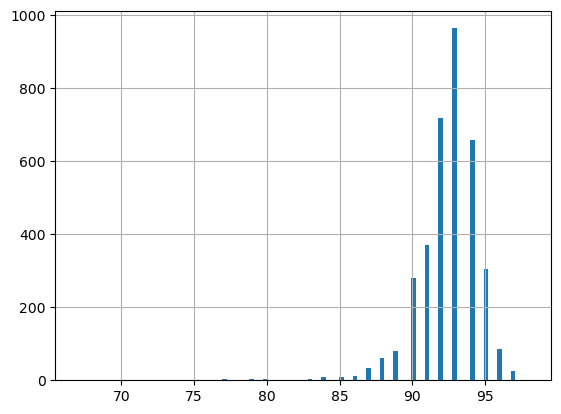

In [35]:
coffee_df['rating'].hist(bins=100)
# So if the minimum recorded rating is 67, it's pretty far separated from the bulk of the observations.
# It looks like most of them are above 80.


In [36]:
coffee_df.loc[coffee_df['rating'] < 80]


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars_per_ounce
2782,100% Colombian Medium Roast,75,5.0,5,7,3,Cloying raw nut and vaguely spicy wood dominat...,Colombia,8.49/28 ounces,Very Dark,Maxwell House,"Northfield, Illinois",0.303214
4102,100% Colombia,79,5.0,6,7,5,Smoky paper was our first descriptor for this ...,Colombia,13.50/12 ounces,Very Dark,HealthWise Gourmet Low Acid Coffee,"Deer Park, Illinois",1.125000
4103,Espresso Blend,79,6.0,6,8,6,A pungent musty note reads charitably as dark ...,Not disclosed.,13.99/12 ounces,Very Dark,Hevla Coffee,"Endicott, New York",1.165833
4104,House Blend,77,4.0,5,7,5,"Flat, woody sensations almost completely domin...",Not disclosed.,10.99/12 ounces,Medium,Puroast,"Woodland, California",0.915833
4105,Gourmet Blend Regular,77,5.0,5,7,4,"A hard, medicinal taint dominates in aroma, cu...",Not disclosed.,12.99/12 ounces,Medium-Dark,Hevla Coffee,"Endicott, New York",1.082500
4337,100% Colombian,79,5.0,6,6,6,"Clean, simple, woody. Sweet, mildly charred wo...",Colombia,3.30/11.3 ounces,Very Dark,Great Value (Walmart),"Bentonville, Arkansas",0.292035
4338,100% Colombian,77,5.0,5,7,4,"Decent structure: tartly brisk, though bitteri...",Colombia,4.73/11 ounces,Medium,Eight O'Clock Coffee (Walmart),"Montvale, New Jersey",0.430000
4339,Classic Roast,67,3.0,4,6,1,"Flat and woody with a cloying, disturbing swee...",Not disclosed.,11.04/48 ounces,Very Dark,Folgers (Costco),"Orrville, Ohio",0.230000
4391,Festival Blend,79,4.0,7,7,6,Very atypical aroma and flavor. Richly charred...,Philippines.,13.49/16 ounces,Dark,Faustino Coffee,"Ontario, California",0.843125
4421,Special Roast,71,4.0,6,6,4,Woody and vaguely sweet with a background salt...,Not disclosed.,7.49/11 ounces,Very Dark,Folgers,"Orrville, Ohio",0.680909


In [37]:
lowest_rated = coffee_df.loc[coffee_df['rating'] < 80]
lowest_rated.describe()
# Unsurprisingly, this subset of outliers with the lowest ratings also include the lowest values for aftertaste,
# aroma, body, flavor, and price for the entire dataset. I feel comfortable dropping these 14 observations.


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,75.714286,4.571429,5.571429,6.642857,4.285714,0.696303
std,3.539417,0.755929,0.755929,0.633324,1.382783,0.309651
min,67.000000,3.000000,4.000000,6.000000,1.000000,0.230000
25%,74.250000,4.000000,5.000000,6.000000,4.000000,0.465455
50%,77.000000,5.000000,6.000000,7.000000,4.000000,0.689484
75%,78.750000,5.000000,6.000000,7.000000,5.000000,0.897656
max,79.000000,6.000000,7.000000,8.000000,6.000000,1.165833


In [38]:
coffee_df = coffee_df.drop(coffee_df.loc[coffee_df['rating'] < 80].index)
coffee_df.describe()
# That's a lot better! I'm going to take a look at 50 observations with the lowest price, because that's 
# still an outlier.
# And the max value for price is definitely an outlier! Geez.


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000
mean,92.496272,8.075946,8.714720,8.444076,8.876001,2.226829
std,1.958351,0.576260,0.541204,0.557700,0.487786,4.218134
min,80.000000,5.000000,6.000000,6.000000,6.000000,0.280938
25%,92.000000,8.000000,8.000000,8.000000,9.000000,1.245833
50%,93.000000,8.000000,9.000000,8.000000,9.000000,1.491667
75%,94.000000,8.000000,9.000000,9.000000,9.000000,1.875000
max,98.000000,10.000000,10.000000,10.000000,10.000000,157.497359


In [39]:
cheapest = coffee_df.sort_values(by='dollars_per_ounce', ascending=True)
cheapest.head(50)
# I think I'm going to keep these observations. Many of them still have high ratings and it will be interesting to see
# if there are any aspects of these beans that makes them lower in price, or if it's just the roaster.


,title,rating,aftertaste,aroma,body,flavor,blind_assessment,coffee_origin,est_price,roast_level,roaster,roaster_location,dollars_per_ounce
1418,100% Guatemalan,87,7.0,8,7,8,"Sweetly nut-toned, roasty. Hazelnut, baking ch...",Guatemala,8.99/32 ounces,Medium-Dark,Hill's Bros. Coffee,"San Francisco, California",0.280938
4336,Organic Rainforest Blend,80,6.0,6,6,6,Heavily scorched wood dominates in aroma and c...,Not disclosed.,16.80/48 ounces,Very Dark,San Francisco Bay Coffee (Costco),"Lincoln, California",0.350000
4333,House Blend Medium Roast,82,5.0,7,7,6,"Balanced, quiet, clean. Gently charred cedar, ...",Not disclosed.,11.52/32 ounces,Dark,Kirkland Signature (Costco),"Seattle, Washington",0.360000
4335,Veranda Blend Blonde,80,5.0,6,7,6,"Sweet-toned, clean, neutral. Grainy sweetness,...",Not disclosed.,14.80/40 ounces,Medium,Starbucks Coffee (Costco),"Seattle, Washington",0.370000
1850,Colombian Supremo,90,7.0,8,8,9,"Roasty-sweet, spice-toned. Banana, orange blos...","Concordia, Colombia",17.99/3 pounds,Medium-Dark,Kirkland Signature (Costco),"Lincoln, California",0.374792
1849,Rwandan,87,7.0,7,8,8,"Crisp, chocolaty, roast-framed. Baker’s chocol...",Rwanda,37.99/6 pounds,Medium-Dark,Kirkland Signature (Costco),"Seattle, Washington",0.395729
4603,Mexican Extra Fine Gourmet Coffee,90,8.0,8,8,8,"Crisp, cocoa-toned nut and dark malted barley ...","Oaxaca, Mexico",7.00/17 ounces,Medium,Café Juquila,"Mexico City, Mexico",0.411765
1420,Colombia,89,7.0,8,8,9,"Rich-toned, chocolaty. Dark chocolate, cedar, ...",Colombia,4.99/12 ounces,Medium-Dark,HT Traders,"Matthews, North Carolina",0.415833
1082,5a Poniente,86,7.0,7,7,8,"Chocolaty, sweetly smoky. Dark chocolate, scor...","Antigua growing region, Guatemala",5.00/12 ounces,Medium-Dark,El Gran Café,"Antigua, Guatemala",0.416667
199,5a Sur,91,7.0,9,9,8,"Chocolate-toned, richly sweet-savory. Dark cho...","Antigua growing region, Guatemala",5.00/12 ounces,Medium,El Gran Cafe,"Antigua, Guatemala",0.416667


In [40]:
coffee_df.describe(percentiles=[.75,.8,.85,.9,.95])
# So the prices stay in the single-digits even up into the 95th percentile.
# Let's break it down a bit further.


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000
mean,92.496272,8.075946,8.714720,8.444076,8.876001,2.226829
std,1.958351,0.576260,0.541204,0.557700,0.487786,4.218134
min,80.000000,5.000000,6.000000,6.000000,6.000000,0.280938
50%,93.000000,8.000000,9.000000,8.000000,9.000000,1.491667
75%,94.000000,8.000000,9.000000,9.000000,9.000000,1.875000
80%,94.000000,8.000000,9.000000,9.000000,9.000000,2.083333
85%,94.000000,9.000000,9.000000,9.000000,9.000000,2.599000
90%,95.000000,9.000000,9.000000,9.000000,9.000000,3.875000
95%,95.000000,9.000000,9.000000,9.000000,9.000000,6.243750


In [41]:
coffee_df.describe(percentiles=[.95,.96,.97,.98,.99])
# Wow! I wonder if those in the 99th percentile are due to typos or something. I'll drop
# all of the observations that are over $10/oz.


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000,3621.000000
mean,92.496272,8.075946,8.714720,8.444076,8.876001,2.226829
std,1.958351,0.576260,0.541204,0.557700,0.487786,4.218134
min,80.000000,5.000000,6.000000,6.000000,6.000000,0.280938
50%,93.000000,8.000000,9.000000,8.000000,9.000000,1.491667
95%,95.000000,9.000000,9.000000,9.000000,9.000000,6.243750
96%,95.000000,9.000000,9.000000,9.000000,10.000000,6.900000
97%,96.000000,9.000000,9.000000,9.000000,10.000000,7.500000
98%,96.000000,9.000000,10.000000,9.000000,10.000000,9.375000
99%,96.000000,9.000000,10.000000,9.000000,10.000000,12.500000


In [42]:
coffee_df = coffee_df.drop(coffee_df.loc[coffee_df['dollars_per_ounce'] >= 10].index)
coffee_df.describe()


,rating,aftertaste,aroma,body,flavor,dollars_per_ounce
count,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000,3558.000000
mean,92.470489,8.070826,8.708544,8.439011,8.871557,1.905811
std,1.939513,0.573070,0.539359,0.557683,0.484306,1.424509
min,80.000000,5.000000,6.000000,6.000000,6.000000,0.280938
25%,92.000000,8.000000,8.000000,8.000000,9.000000,1.237500
50%,93.000000,8.000000,9.000000,8.000000,9.000000,1.479167
75%,94.000000,8.000000,9.000000,9.000000,9.000000,1.833333
max,97.000000,10.000000,10.000000,10.000000,10.000000,9.987500


In [46]:
coffee_df['coffee_origin'].value_counts()


Yirgacheffe growing region, southern Ethiopia          106
Not disclosed.                                          91
Yirgacheffe growing region, southern Ethiopia.          81
Boquete growing region, western Panama                  71
Nyeri growing region, south-central Kenya               69
                                                      ... 
Pitalito-Bruselas, Huila Department, Colombia            1
San Isidro, Acevedo, Huila, Colombia                     1
Guji Zone, Oromia Region, Sidama Province, Ethiopia      1
Panama; Ethiopia; Burundi                                1
Kona, Hawaii; Sumatra; Ethiopia                          1
Name: coffee_origin, Length: 1430, dtype: int64

In [44]:
coffee_df.to_csv('clean_coffee.csv')


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
    
    I sure did! Some more than others.
    
2. Did the process of cleaning your data give you new insights into your dataset?

    Yes, I'm now curious as to how the roaster affects the price. There were some grocery store roasteries that were highly rated, but very low-priced.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

    I'll want to look at 
    -the distribution of roast level per quartile by rating, and by price
    -which rating types most heavily correlate with price
    -wordclouds for blind assessment and coffee origin per quartile by rating and by price